## Using data straight from the source
- Data maybe from highway I80 or I-101 (Los Angeles CA)
- Contains instantatneous acceleration and speed as well
- 

__Notes__
- For now, only I-101 data is used 
- For now, we are only concerned with interruptions i.e., acceleration/ deceleration values and thier durations (in combinations) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DIR = "./raw_data/us-101-vehicle-trajectory-data/vehicle-trajectory-data/"

time_1 = "0750am-0805am"
time_2 = "0805am-0820am"
time_3 = "0820am-0835am"

first = f"{DIR + time_1}/trajectories-{time_1}.csv"
second = f"{DIR + time_2}/trajectories-{time_2}.csv"
third = f"{DIR + time_3}/trajectories-{time_3}.csv"
print(first)
print(second)
print(third)

./raw_data/us-101-vehicle-trajectory-data/vehicle-trajectory-data/0750am-0805am/trajectories-0750am-0805am.csv
./raw_data/us-101-vehicle-trajectory-data/vehicle-trajectory-data/0805am-0820am/trajectories-0805am-0820am.csv
./raw_data/us-101-vehicle-trajectory-data/vehicle-trajectory-data/0820am-0835am/trajectories-0820am-0835am.csv


In [3]:
first_data = pd.read_csv(first)

In [4]:
first_data.head(10)
# 1048375 rows × 18 columns.. one million rows

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
5,2,18,437,1118846980700,16.364,55.381,6451151.084,1873330.153,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
6,2,19,437,1118846980800,16.344,59.381,6451153.772,1873327.192,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
7,2,20,437,1118846980900,16.323,63.379,6451156.461,1873324.230,14.5,4.9,2,40.02,0.25,2,0,0,0.0,0.0
8,2,21,437,1118846981000,16.303,67.383,6451159.149,1873321.268,14.5,4.9,2,40.03,0.13,2,0,0,0.0,0.0
9,2,22,437,1118846981100,16.282,71.398,6451161.838,1873318.307,14.5,4.9,2,39.93,-1.63,2,0,13,0.0,0.0


### Problems: 
    - many vehicle types (select only cars) vehicle class (1- motorcycle, 2-auto, 3-truck) 
    - Sampling frequency is actually not high.
    - irrelevant columns for us (get a subset)

In [5]:
# select only cars
first_data_cars = first_data[first_data['v_Class'] == 2]

In [6]:
first_data_cars.head(-10)
# 1010338 rows × 18 columns .. only a small number (4%) reduced (makes sense, way too many cars)

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
5,2,18,437,1118846980700,16.364,55.381,6451151.084,1873330.153,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
6,2,19,437,1118846980800,16.344,59.381,6451153.772,1873327.192,14.5,4.9,2,40.00,0.00,2,0,0,0.00,0.00
7,2,20,437,1118846980900,16.323,63.379,6451156.461,1873324.230,14.5,4.9,2,40.02,0.25,2,0,0,0.00,0.00
8,2,21,437,1118846981000,16.303,67.383,6451159.149,1873321.268,14.5,4.9,2,40.03,0.13,2,0,0,0.00,0.00
9,2,22,437,1118846981100,16.282,71.398,6451161.838,1873318.307,14.5,4.9,2,39.93,-1.63,2,0,13,0.00,0.00


In [7]:
# Count the number of vehicle ids (unique) and number of values associated with them
# No. of unique car values
unique_car_ids = pd.unique(first_data_cars['Vehicle_ID'])
print("Unique",len(unique_car_ids))
print(unique_car_ids)

Unique 1916
[   2    4    5 ... 2779 2780 2783]


In [8]:
lengths = []
for car_id in unique_car_ids:
    car_id_data = first_data_cars[first_data_cars['Vehicle_ID'] == car_id]
    lengths.append(len(car_id_data))
lengths = np.asarray(lengths)

In [9]:
lengths.shape

(1916,)

Text(0, 0.5, 'Frequency of such car ids')

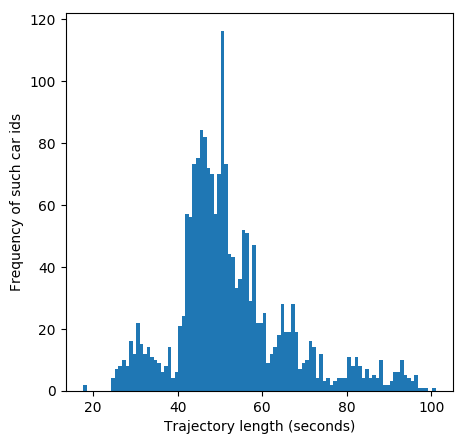

In [10]:
fig, ax = plt.subplots(figsize=(5,5), dpi = 100)
ax.hist(lengths/10, bins=100);
ax.set_xlabel("Trajectory length (seconds)")
ax.set_ylabel("Frequency of such car ids")
ax.set_title(f"mean = {round(np.mean(lengths/10),2)} seconds")

In [11]:
first_data_cars[0:450]

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
5,2,18,437,1118846980700,16.364,55.381,6451151.084,1873330.153,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
6,2,19,437,1118846980800,16.344,59.381,6451153.772,1873327.192,14.5,4.9,2,40.00,0.00,2,0,0,0.0,0.0
7,2,20,437,1118846980900,16.323,63.379,6451156.461,1873324.230,14.5,4.9,2,40.02,0.25,2,0,0,0.0,0.0
8,2,21,437,1118846981000,16.303,67.383,6451159.149,1873321.268,14.5,4.9,2,40.03,0.13,2,0,0,0.0,0.0
9,2,22,437,1118846981100,16.282,71.398,6451161.838,1873318.307,14.5,4.9,2,39.93,-1.63,2,0,13,0.0,0.0


<class 'numpy.ndarray'> (1010338,)


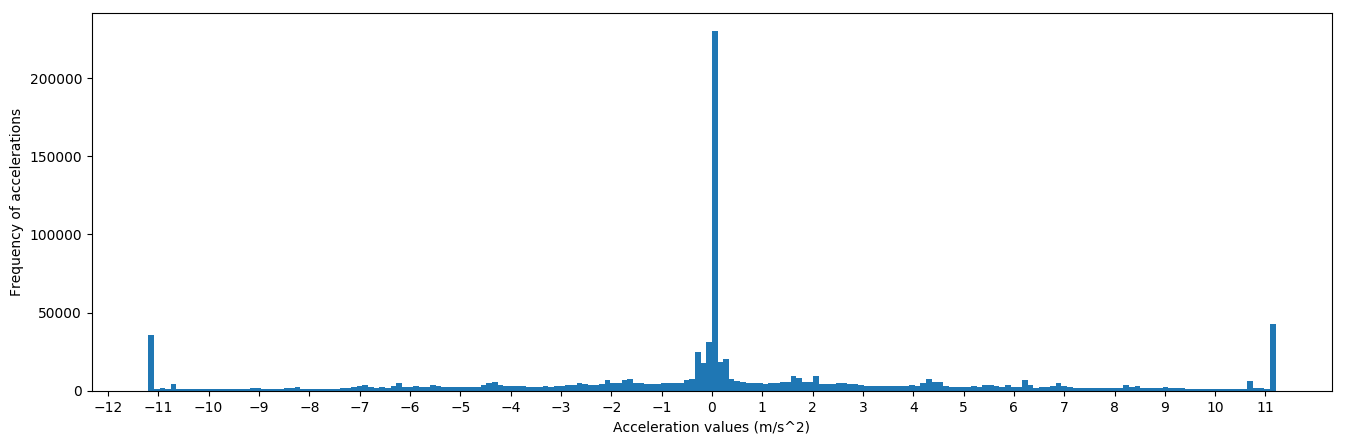

In [12]:
# Find threshold of near zero accelerations
acceleration_values = np.array(first_data_cars['v_Acc'])
print(type(acceleration_values), acceleration_values.shape)

fig, ax = plt.subplots(figsize=(16,5), dpi = 100)
ax.hist(acceleration_values, bins = 200);

ax.set_xlabel("Acceleration values (m/s^2)")
ax.set_ylabel("Frequency of accelerations")

ax.set_xticks(np.arange(-12,12,1));

<class 'numpy.ndarray'> (407616,)


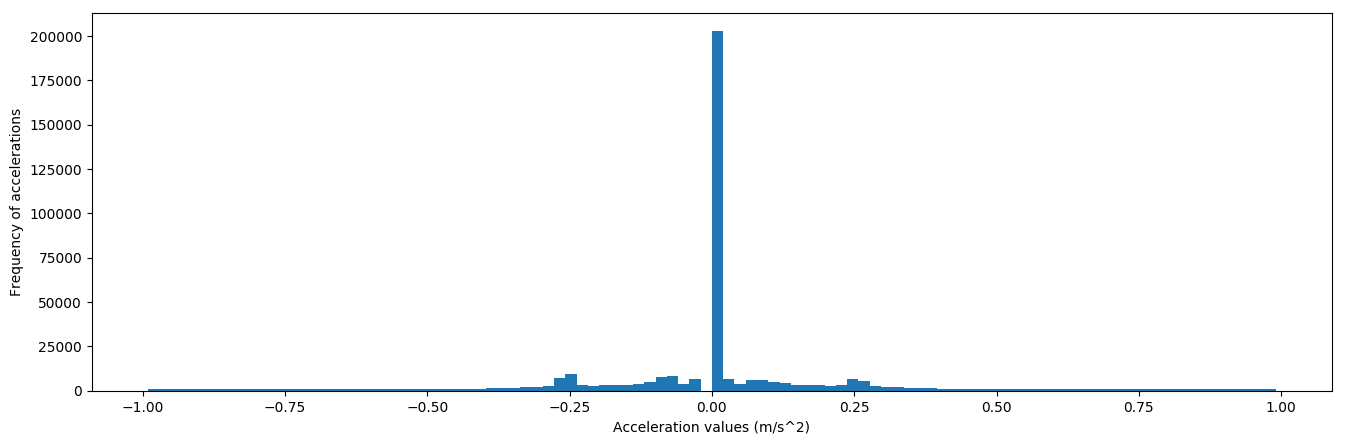

In [13]:
# Find threshold of near zero accelerations
# A closer look at the center
acceleration_values_closer = []

for element in acceleration_values:
    if np.abs(element)< 1:
        acceleration_values_closer.append(element)
        
acceleration_values_closer = np.asarray(acceleration_values_closer)

print(type(acceleration_values_closer), acceleration_values_closer.shape)

fig, ax = plt.subplots(figsize=(16,5), dpi = 100)
ax.hist(acceleration_values_closer, bins = 100);

ax.set_xlabel("Acceleration values (m/s^2)")
ax.set_ylabel("Frequency of accelerations")

ax.set_xticks(np.arange(-1,1.1,0.25));

In [14]:
acceleration_values

array([ 0.  ,  0.  ,  0.  , ..., -0.48,  0.  , -2.17])

In [15]:
unique_lane_ids = pd.unique(first_data_cars['Lane_ID'])
print(unique_lane_ids, len(unique_lane_ids))

valid_lane_ids = [3,4,5,6,7,8]
first_data_cars_valid_lanes = first_data_cars[first_data_cars['Lane_ID'].isin(valid_lane_ids)]
first_data_cars_valid_lanes.head(-10) # 573677 rows half a million

[2 1 7 6 5 4 3 8] 8


,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
437,4,128,351,1118846991700,66.278,504.828,6451438.314,1872975.695,16.0,4.9,2,40.71,0.00,7,0,0,0.00,0.00
438,4,129,351,1118846991800,66.405,508.325,6451440.836,1872973.269,16.0,4.9,2,40.71,0.00,7,0,0,0.00,0.00
439,4,130,351,1118846991900,66.069,512.841,6451444.426,1872970.510,16.0,4.9,2,40.71,0.00,7,0,0,0.00,0.00
440,4,131,351,1118846992000,66.196,516.338,6451446.948,1872968.083,16.0,4.9,2,40.71,0.00,7,0,0,0.00,0.00
441,4,132,351,1118846992100,65.860,520.854,6451450.538,1872965.324,16.0,4.9,2,40.71,0.00,7,0,0,0.00,0.00
442,4,133,351,1118846992200,65.974,524.592,6451453.175,1872962.812,16.0,4.9,2,40.71,7.28,7,0,0,0.00,0.00
443,4,134,351,1118846992300,65.891,528.682,6451456.313,1872960.118,16.0,4.9,2,41.61,11.20,7,0,0,0.00,0.00
444,4,135,351,1118846992400,65.784,532.901,6451459.556,1872957.361,16.0,4.9,2,42.85,11.20,7,0,0,0.00,0.00
445,4,136,351,1118846992500,65.604,537.272,6451462.941,1872954.575,16.0,4.9,2,43.91,7.20,7,0,0,0.00,0.00
446,4,137,351,1118846992600,65.297,541.724,6451466.480,1872951.822,16.0,4.9,2,44.44,3.37,7,0,0,0.00,0.00


In [16]:
# numpy only supports storage of variable lists as numpy array if dtype = object

acceleration_periods = []
threshold = 0.05
# Since I know first veh and lane start at these
# Although in head it appears like int, dtype is double/ float or something

last_veh = 4.0
last_lane = 7.0
last_sign = 1.0 # 1 = positive (accn), -1 = negative (decel)
# When does this period end?
# 1. If the vehicle changes lane
# 2. If the reading itself jumps to another vehicle
# 3. If the abs value of de/acceleration drops below threshold
# 4. If there is a sign change in accn, decen

flag = False
period = []

# frequency
periods_with_veh_id=[]

# Can this be done in a single pass of the data?
for i, row in first_data_cars_valid_lanes.iterrows():
    current_veh = row['Vehicle_ID']
    current_lane = row['Lane_ID']
    current_sign = np.sign(row['v_Acc'])
    current_value = row['v_Acc']
    
    if current_veh==last_veh and current_lane ==last_lane and np.abs(current_value)>=threshold and current_sign == last_sign:    
        # When the first item gets here, the period could be empty
        if len(period)<1:
            period.append(last_value)
        period.append(current_value)
        #print(period)
    else: 
        # period has ended, not when period did not even begin
        if len(period)>1:
            acceleration_periods.append(period)
            periods_with_veh_id.append((current_veh, period))
            period = []
            #print("end")
            # Impossible values, if a new period is started things should not continue from last
            last_sign = -2
            last_veh = 0
            last_lane = 0
            last_value = float('-inf')
        else:
            last_sign = current_sign
            last_veh = current_veh
            last_lane = current_lane
            last_value = current_value
            
    #print(current_sign, last_sign, row['v_Acc'])
    
acceleration_periods = np.asarray(acceleration_periods, dtype = object)

In [17]:
print(acceleration_periods[0:10])
acceleration_periods.shape

[list([7.28, 11.2, 11.2, 7.2, 3.37, 0.85])
 list([-0.46, -2.23, -5.27, -7.57, -8.38, -9.01, -10.3, -10.16, -5.81])
 list([5.02, 4.48, 1.75]) list([-4.89, -9.41, -4.45])
 list([11.2, 10.4, 2.13]) list([-6.87, -2.14])
 list([11.2, 11.2, 11.16, 5.28, 1.04])
 list([-0.54, -2.55, -5.59, -7.3, -5.66, -3.05, -2.59, -4.53])
 list([4.51, 9.89, 11.2, 11.2, 11.2, 11.2])
 list([-11.2, -11.2, -11.2, -9.6])]


(84209,)

Text(0, 0.5, 'Deceleration Intensity')

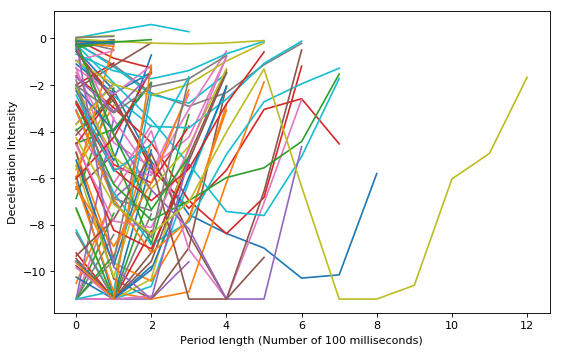

In [18]:
# Sample Plots
fig, ax = plt.subplots(figsize=(8,5), dpi = 80)

for i in acceleration_periods[0:200]:
    if i[0] <= threshold: # deecelerations 
        #print(i)
        ax.plot(i)
    
ax.set_xlabel("Period length (Number of 100 milliseconds)")
ax.set_ylabel("Deceleration Intensity")
#ax.set_xticks(np.arange(0,2.1,0.1));

Text(0, 0.5, 'Acceleration Intensity')

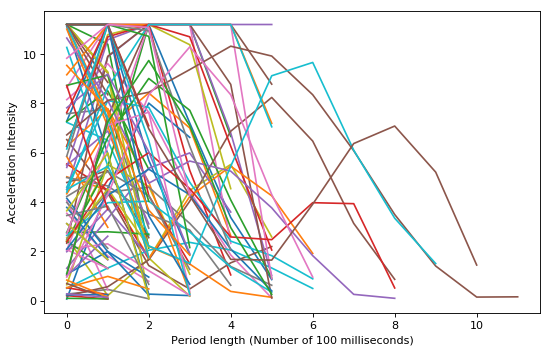

In [19]:
# Sample Plots
fig, ax = plt.subplots(figsize=(8,5), dpi = 80)

for i in acceleration_periods[0:200]:
    if i[0] >= threshold: # deecelerations 
        #print(i)
        ax.plot(i)
    
ax.set_xlabel("Period length (Number of 100 milliseconds)")
ax.set_ylabel("Acceleration Intensity")
#ax.set_xticks(np.arange(0,2.1,0.1));

[6 9 3 ... 5 4 3] (84209,)


(0, 2.0)

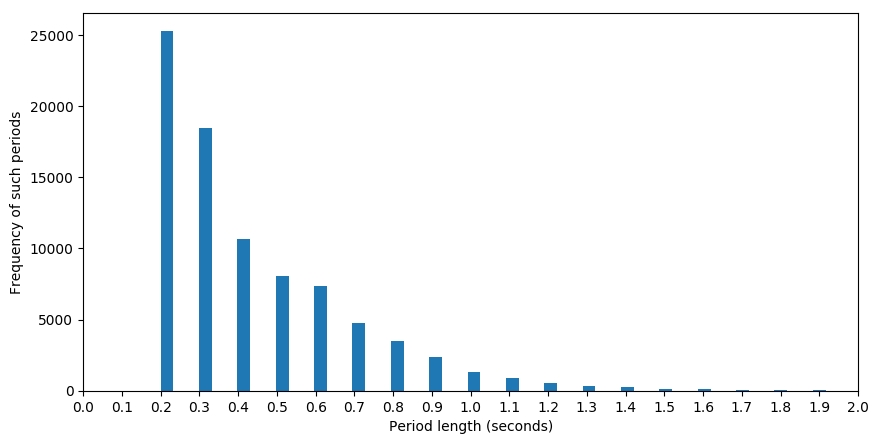

In [20]:
# For lengths of periods, 10 concesutive frames = 1 second
lengths_p = []
for i in acceleration_periods:
    lengths_p.append(len(i))
    
lengths_p = np.asarray(lengths_p)
print(lengths_p, lengths_p.shape)

fig, ax = plt.subplots(figsize=(10,5), dpi = 100)
ax.hist(lengths_p/10, bins=100);
ax.set_xlabel("Period length (seconds)")
ax.set_ylabel("Frequency of such periods")
ax.set_xticks(np.arange(0,2.1,0.1));
ax.set_xlim([0,2.0])

In [21]:
# A closer look between 1 and 5

In [22]:
# weighted means of the three

vs_mean = np.mean(np.asarray([i/10 for i in lengths_p if (i/10 >=0.2 and i/10 <=0.5)]))
s_mean = np.mean(np.asarray([i/10 for i in lengths_p if (i/10 >=0.5 and i/10 <=1.0)]))
m_mean = np.mean(np.asarray([i/10 for i in lengths_p if i/10 >=1.0]))
print(vs_mean, s_mean, m_mean)

0.3024440994285897 0.6585422825650571 1.187563655856339


In [30]:
lengths_p

array([6, 9, 3, ..., 5, 4, 3])

In [31]:
# Frequency, Each vehicle passes through the road once

very_short_count = 0 # 0.2 to 0.5 corresponds to length 2 to 5, how many have lengths 2 to 5
short_count = 0 # 0.5 to 10, 6 to 10
medium_count = 0 # greater than 1, greater than 10

last_veh_id = 4.0 
counts = []
for i in periods_with_veh_id:
    current_veh = i[0]
    current_period_length = len(i[1])
    
    if current_veh == last_veh_id:
        if current_period_length >=2 and current_period_length<=5:
            very_short_count+=1
        elif current_period_length >5 and current_period_length<=10:
            short_count+=1
        else:
            medium_count+=1 
    else: 
        counts.append([last_veh_id, very_short_count,short_count,medium_count])
        very_short_count = 0 # 0.2 to 0.5 corresponds to length 2 to 5, how many have lengths 2 to 5
        short_count = 0 # 0.5 to 10, 6 to 10
        medium_count = 0 # greater than 1, greater than 10

    last_veh_id = current_veh

In [33]:
counts = np.asarray(counts)
print(counts.shape)

(1224, 4)


In [35]:
print(counts[0:10])

[[ 4. 46. 14.  0.]
 [ 5. 56. 15.  0.]
 [ 6. 42. 14.  1.]
 [ 8. 45.  9.  3.]
 [ 9. 48.  9.  1.]
 [18. 36.  9.  1.]
 [20. 45.  8.  3.]
 [21. 51. 13.  2.]
 [25. 50. 13.  0.]
 [31. 51. 19.  1.]]


(1224,)
(1221,)
(1224,)
(1213,)
(1224,)
(1013,)


Text(0.5, 1.0, 'mean = 2 times')

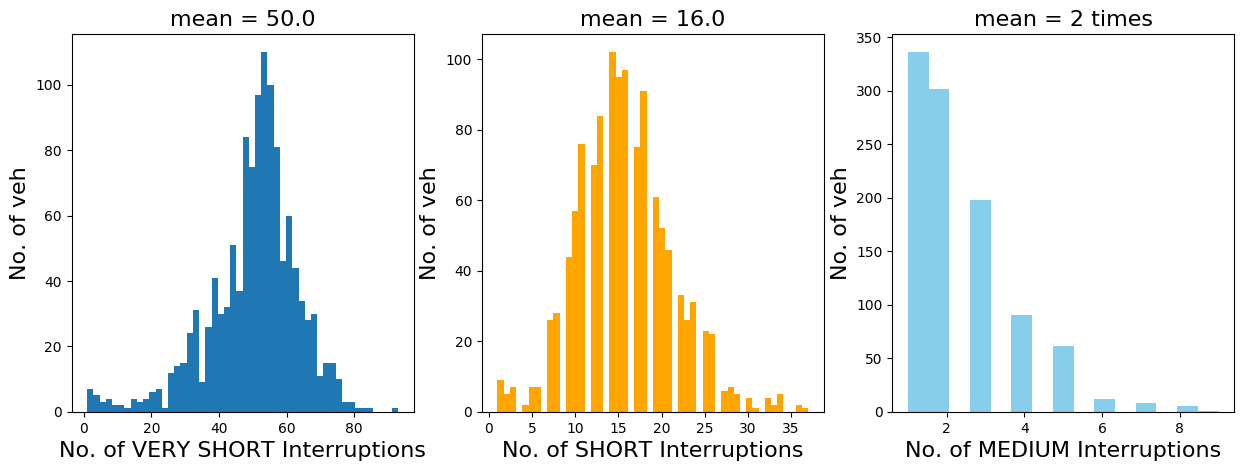

In [61]:
very_short_collect = np.array(counts[:,1])
print(very_short_collect.shape)
very_short_collect = very_short_collect[np.where(very_short_collect!=0)]
print(very_short_collect.shape)

short_collect = np.array(counts[:,2])
print(short_collect.shape)
short_collect = short_collect[np.where(short_collect!=0)]
print(short_collect.shape)

medium_collect = np.array(counts[:,3])
print(medium_collect.shape)
medium_collect = medium_collect[np.where(medium_collect!=0)]
print(medium_collect.shape)

fs = 16

fig, ax = plt.subplots(1,3,figsize=(15,5), dpi = 100, sharey=False)
ax[0].hist(very_short_collect, bins=50)
ax[0].set_xlabel("No. of VERY SHORT Interruptions", fontsize=fs)
ax[0].set_ylabel("No. of veh", fontsize=fs)
ax[0].set_title(f"mean = {round(np.mean(very_short_collect),0)}", fontsize=fs)

ax[1].hist(short_collect, bins=50, color = "orange")
ax[1].set_xlabel("No. of SHORT Interruptions", fontsize=fs)
ax[1].set_ylabel("No. of veh", fontsize=fs)
ax[1].set_title(f"mean = {round(np.mean(short_collect),0)}", fontsize=fs)

ax[2].hist(medium_collect, bins=15, color = "skyblue")
ax[2].set_xlabel("No. of MEDIUM Interruptions", fontsize=fs)
ax[2].set_ylabel("No. of veh", fontsize=fs)
ax[2].set_title(f"mean = {round(np.mean(medium_collect),0)}", fontsize=fs)


In [87]:
# Intensities
very_short_intensities = []
short_intensities = []
medium_intensities = []

for i in periods_with_veh_id:
    if len(i[1])>=2 and len(i[1])<=5:
        very_short_intensities.extend(i[1]) # Change to append to see each period
    elif len(i[1])>5 and len(i[1])<=10:
        short_intensities.extend(i[1])
    else: 
        medium_intensities.extend(i[1])    
        
very_short_intensities = np.abs(np.asarray(very_short_intensities))
short_intensities = np.abs(np.asarray(short_intensities))
medium_intensities = np.abs(np.asarray(medium_intensities))

print(very_short_intensities.shape)
print(short_intensities.shape)
print(medium_intensities.shape)

(188958,)
(140044,)
(31108,)


In [88]:
very_short_intensities

array([5.02, 4.48, 1.75, ..., 3.67, 3.67, 0.48])

In [89]:
medium_intensities

array([ 6.72,  8.12,  8.45, ..., 11.17,  6.71,  1.9 ])

Text(0.5, 1.0, 'mean = 5.0 m/s^2')

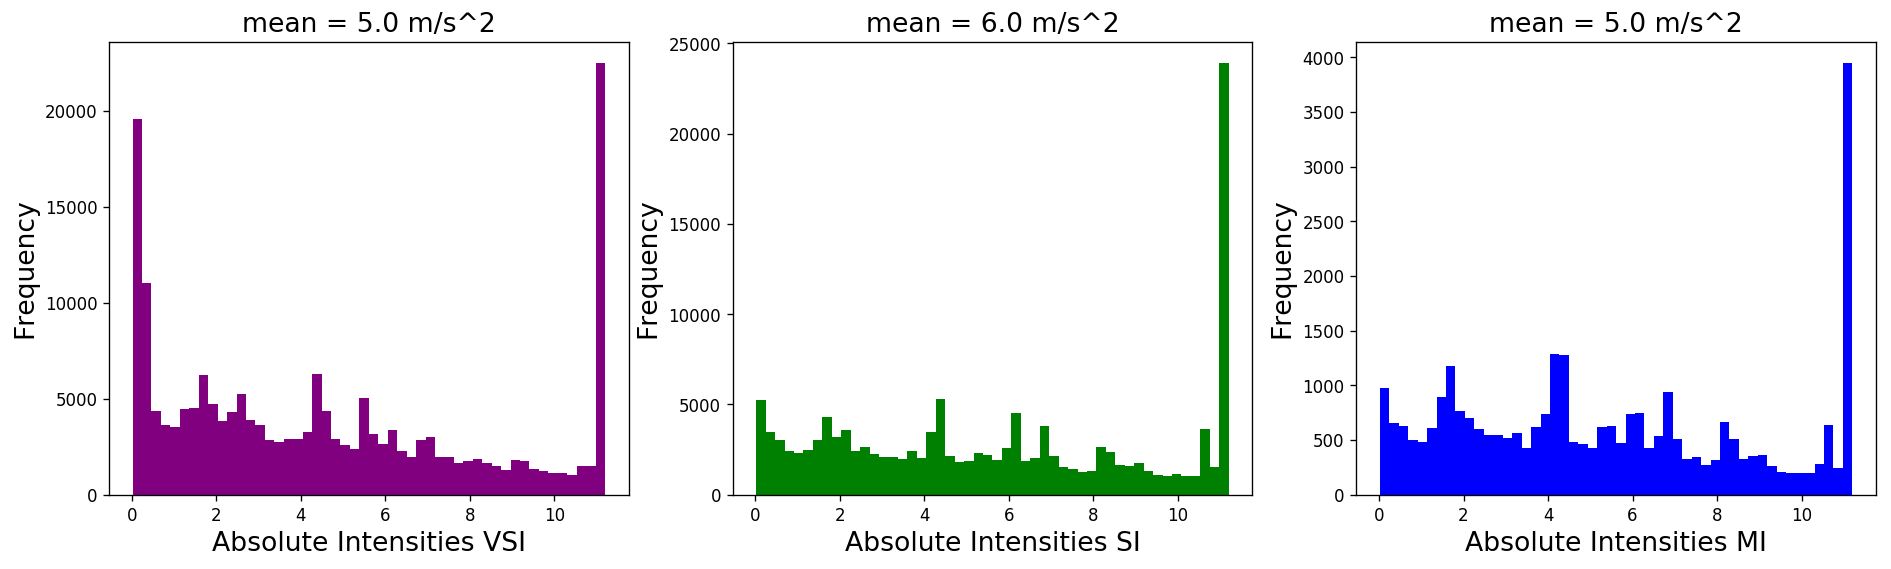

In [92]:
fs = 16

fig, ax = plt.subplots(1,3,figsize=(19,5), dpi = 120, sharey=False)
ax[0].hist(very_short_intensities, bins=50, color = "purple")
ax[0].set_xlabel("Absolute Intensities VSI", fontsize=fs)
ax[0].set_ylabel("Frequency", fontsize=fs)
ax[0].set_title(f"mean = {round(np.mean(very_short_intensities),0)} m/s^2", fontsize=fs)

ax[1].hist(short_intensities, bins=50, color = "green")
ax[1].set_xlabel("Absolute Intensities SI", fontsize=fs)
ax[1].set_ylabel("Frequency", fontsize=fs)
ax[1].set_title(f"mean = {round(np.mean(short_intensities),0)} m/s^2", fontsize=fs)

ax[2].hist(medium_intensities, bins=50, color = "blue")
ax[2].set_xlabel("Absolute Intensities MI", fontsize=fs)
ax[2].set_ylabel("Frequency", fontsize=fs)
ax[2].set_title(f"mean = {round(np.mean(medium_intensities),0)} m/s^2", fontsize=fs)